# Cohort Analysis for assessing customer retention in E-commerce industry

# Importing the needed libaries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Loading the Dataset

In [7]:
cd = pd.read_csv(r'C:\Users\Simon.ansah\OneDrive - Etranzact Ghana\confirmation GIP\Cohort Analysis for assessing customer retention in E-commerce industry\Dataset_ecommerce.csv')
cd.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


# Checking the infomation

In [9]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# checking for the sum of null values in the data

In [10]:
cd.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

# Droping all null values


In [11]:
cd = cd.dropna()

# Rechecking to see if all null values are dropped

In [12]:
cd.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

# checking the data types of the dataset

In [13]:
cd.dtypes

InvoiceNo       object
InvoiceDate     object
CustomerID     float64
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
Country         object
dtype: object

# changing the the datatype of column (InvoiceDate) to datetime

In [14]:
cd.InvoiceDate = pd.to_datetime(cd.InvoiceDate)
cd.InvoiceDate.dtype

C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\2217065637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd.InvoiceDate = pd.to_datetime(cd.InvoiceDate)


dtype('<M8[ns]')

# EDA

# Anlaysis by country on quantity

In [15]:
quantity_country = cd.groupby('Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
quantity_country.head(10)

,Country,Quantity
23,Togo,741223
20,South Africa,740589
4,Cote d'Ivoire,740229
15,Nigeria,739708
9,Libya,739206
1,Benin,738133
27,Zimbabwe,737522
19,Somalia,736219
0,Algeria,736181
18,Sierra Leone,735477


# Ploting a graph

C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\3254281297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantity_country.head(10), x='Country', y='Quantity', palette='viridis')


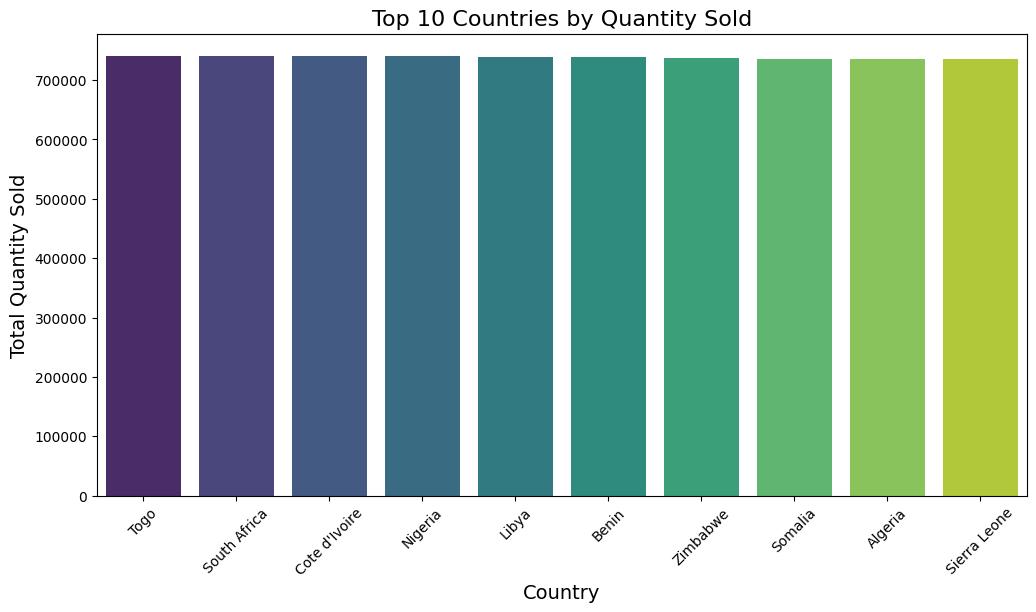

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=quantity_country.head(10), x='Country', y='Quantity', palette='viridis')
plt.title('Top 10 Countries by Quantity Sold', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Buttom 10 counties by Quantity sold

C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\579298988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantity_country.tail(10), x='Country', y='Quantity', palette='viridis')


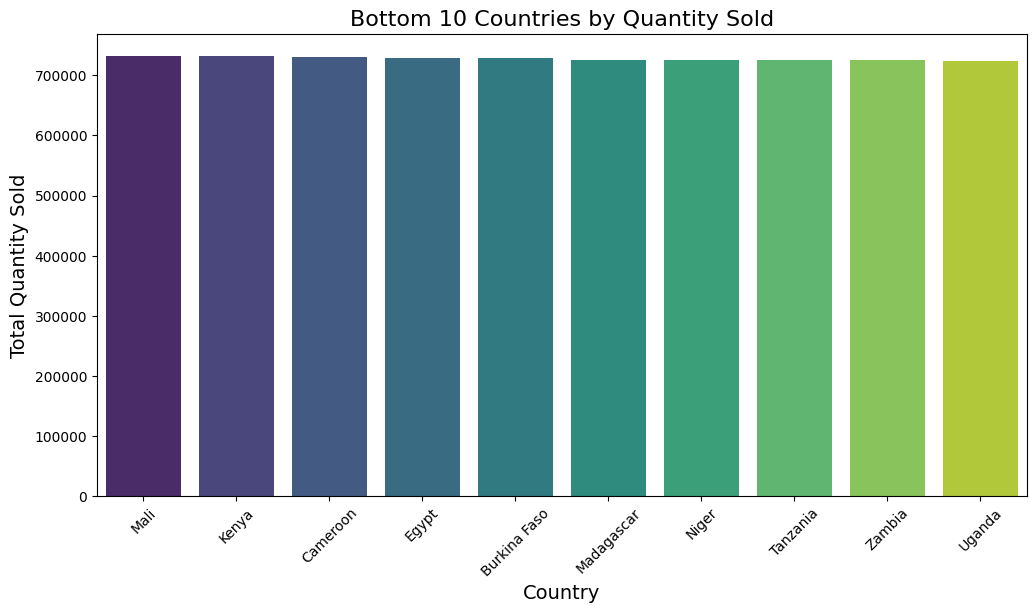

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=quantity_country.tail(10), x='Country', y='Quantity', palette='viridis')
plt.title('Bottom 10 Countries by Quantity Sold', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Aanalysis of countires with customers

In [18]:
country_customers = cd.groupby(['Country'])['CustomerID'].nunique().reset_index().sort_values(by='CustomerID', ascending=False)
country_customers.head(10)

,Country,CustomerID
13,Mozambique,3072
1,Benin,3054
23,Togo,3053
15,Nigeria,3051
2,Burkina Faso,3049
18,Sierra Leone,3046
11,Mali,3044
0,Algeria,3043
17,Senegal,3040
14,Niger,3039


# Ploting the graph 

C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\4254605695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantity_country.head(10), x='Country', y='Quantity', palette='viridis')


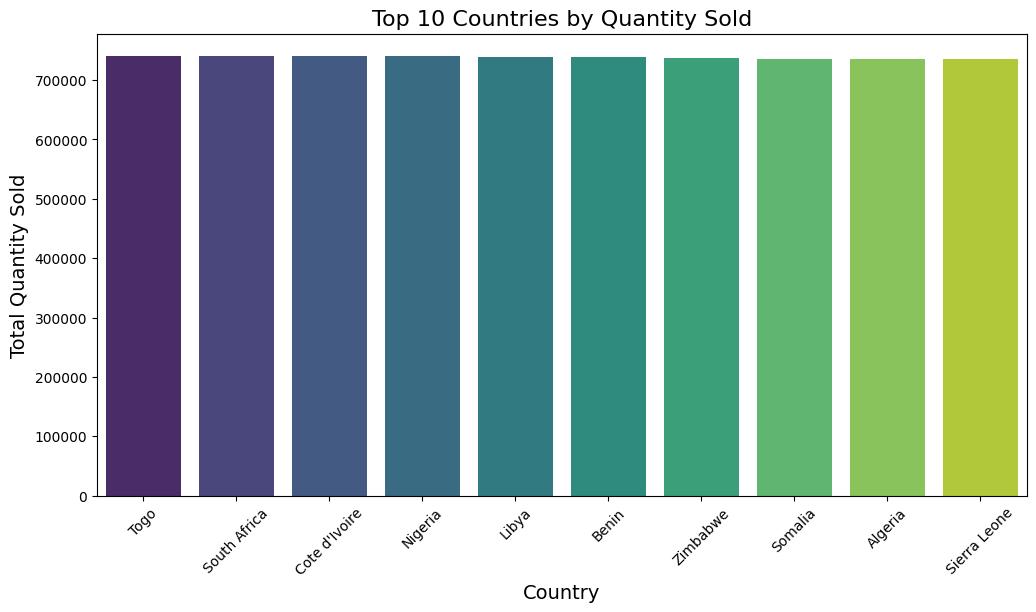

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=quantity_country.head(10), x='Country', y='Quantity', palette='viridis')
plt.title('Top 10 Countries by Quantity Sold', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.show()  


# Counties with least customers (last 10)

C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\579298988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantity_country.tail(10), x='Country', y='Quantity', palette='viridis')


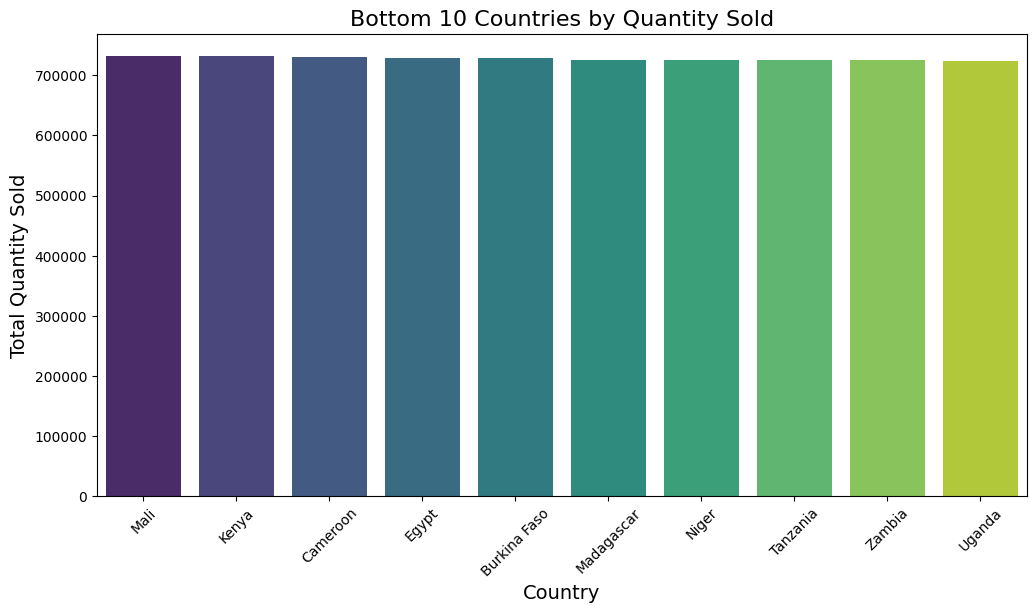

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=quantity_country.tail(10), x='Country', y='Quantity', palette='viridis')
plt.title('Bottom 10 Countries by Quantity Sold', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Sales by month

In [21]:
cd['Month'] = cd['InvoiceDate'].dt.month
cd.head()

C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\1069298025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['Month'] = cd['InvoiceDate'].dt.month


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Month
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,12
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,12
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,12
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,12
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,12


# Grouping the invoicedate to period(month) and summing them by month

In [22]:
monthly_sales = cd.groupby(cd.InvoiceDate.dt.to_period('M'))['Quantity'].sum().reset_index()
monthly_sales.head(10)

,InvoiceDate,Quantity
0,2010-12,1350834
1,2011-01,1105886
2,2011-02,1033468
3,2011-03,1406617
4,2011-04,1175052
5,2011-05,1459981
6,2011-06,1402857
7,2011-07,1388119
8,2011-08,1387695
9,2011-09,2061181


# line plot for monthly sales

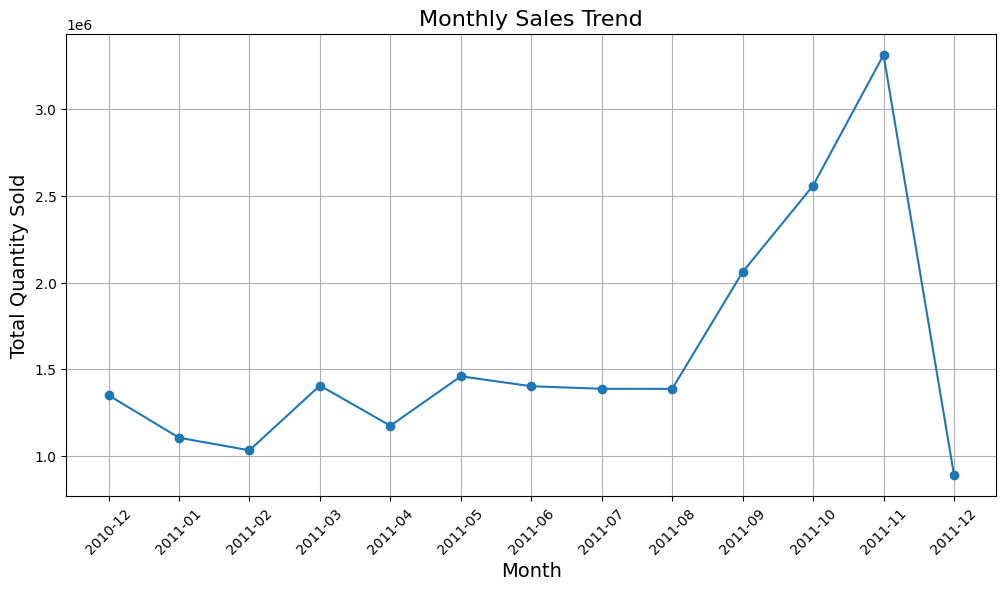

In [23]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['InvoiceDate'].astype(str), monthly_sales['Quantity'], marker='o')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Cohort anaylsis

# a function to get the month and year form the column Invoicedate and add 1 to it 
like datepart in SQL

In [24]:
def get_month(m):
    return dt.datetime(m.year, m.month, 1)



In [27]:
cd['InvoiceDate'] = cd['InvoiceDate'].apply(get_month)


C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\4046909203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['InvoiceDate'] = cd['InvoiceDate'].apply(get_month)


In [26]:
cd.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Month
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,12
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,12
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,12
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,12
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,12


# A function to get the cohort date i.e the first time customers made a purchase

In [36]:
def get_cohortDate(cd):
    cd['CohortDate'] = cd.groupby('CustomerID')['InvoiceDate'].transform('min')
    return cd['CohortDate']


In [40]:
cd['CohortDate'] = get_cohortDate(cd)
cd.head()


C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\2766061791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['CohortDate'] = cd.groupby('CustomerID')['InvoiceDate'].transform('min')
C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\1618597841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['CohortDate'] = get_cohortDate(cd)


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Month,CohortDate
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,12,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,12,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,12,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,12,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,12,2010-12-01


# Cohort Month 

In [42]:
def get_year_month_diff(cd):
    year_diff = cd['InvoiceDate'].dt.year - cd['CohortDate'].dt.year
    month_diff = cd['InvoiceDate'].dt.month - cd['CohortDate'].dt.month
    return year_diff * 12 + month_diff + 1
cd['CohortMonth'] = get_year_month_diff(cd)
cd

C:\Users\Simon.ansah\AppData\Local\Temp\ipykernel_27408\2362161486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['CohortMonth'] = get_year_month_diff(cd)


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Month,CohortDate,CohortMonth
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,12,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,12,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,12,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,12,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,12,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,12,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,12,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,12,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,12,2011-08-01,5


# Cohort Table

First create an info to get the table

In [43]:
Cohort_info = cd.groupby(['CohortDate', 'CohortMonth'])['CustomerID'].nunique().reset_index()
Cohort_info.head(10)

,CohortDate,CohortMonth,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
5,2010-12-01,6,376
6,2010-12-01,7,360
7,2010-12-01,8,336
8,2010-12-01,9,336
9,2010-12-01,10,374


In [44]:
Cohort_info.rename(columns={'CustomerID': 'TotalCustomers'}, inplace=True)
Cohort_info.head(10)

,CohortDate,CohortMonth,TotalCustomers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
5,2010-12-01,6,376
6,2010-12-01,7,360
7,2010-12-01,8,336
8,2010-12-01,9,336
9,2010-12-01,10,374


In [46]:
Cohort_Table = Cohort_info.pivot(index='CohortDate', columns='CohortMonth', values='TotalCustomers')
Cohort_Table.index = Cohort_Table.index.strftime('%B-%Y')
Cohort_Table

CohortMonth,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December-2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January-2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February-2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March-2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April-2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May-2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June-2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July-2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August-2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


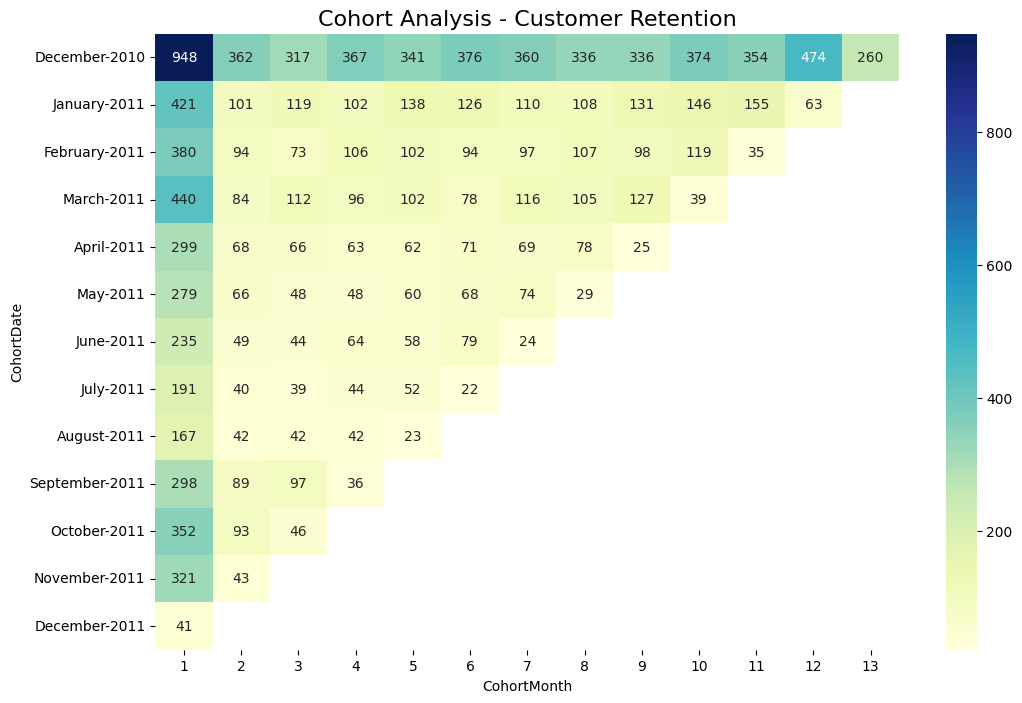

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(Cohort_Table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Cohort Analysis - Customer Retention', fontsize=16)  
plt.show()

In [51]:
Cohort_Table

CohortMonth,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December-2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January-2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February-2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March-2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April-2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May-2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June-2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July-2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August-2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# % of cohort retention over months

In [ ]:
rentention_rate = Cohort_Table.divide(Cohort_Table.iloc[:,0], axis=0)   

In [54]:
rentention_rate

CohortMonth,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December-2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January-2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February-2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March-2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April-2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May-2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June-2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July-2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August-2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


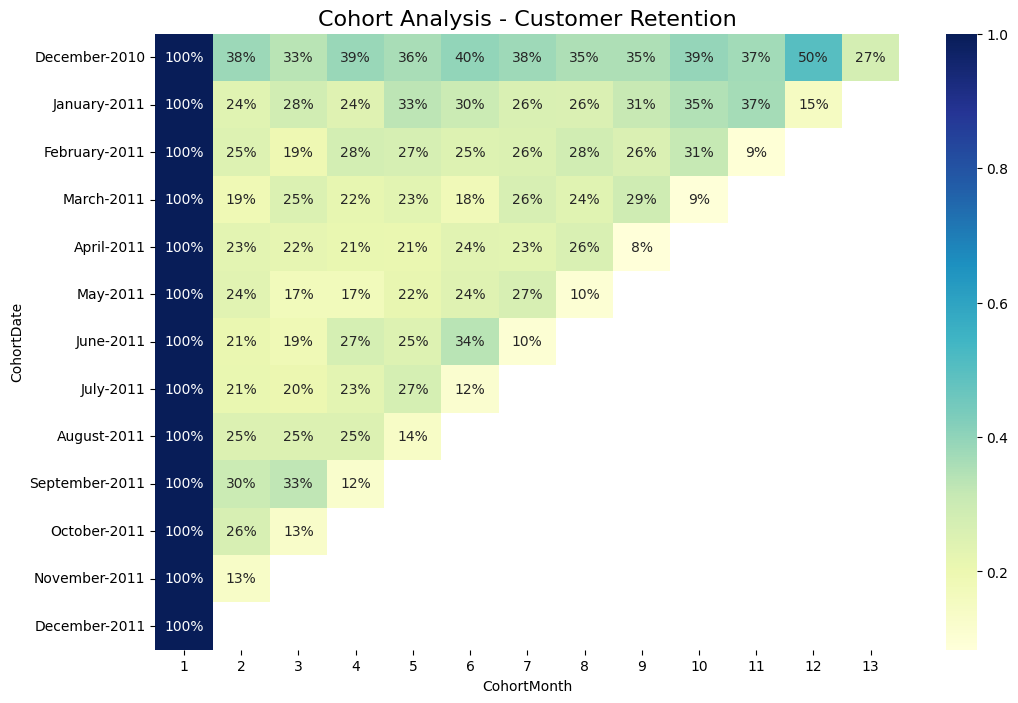

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(rentention_rate, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Customer Retention', fontsize=16)
plt.show()      

# Quantity bought by cohort

In [62]:
Quantity_bought_by_cohort = cd.groupby(['CohortDate', 'CohortMonth'])['Quantity'].mean().reset_index()
Quantity_bought_by_cohort.head(10)

,CohortDate,CohortMonth,Quantity
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
5,2010-12-01,6,50.423309
6,2010-12-01,7,50.526334
7,2010-12-01,8,50.467858
8,2010-12-01,9,50.182266
9,2010-12-01,10,50.574346


In [63]:
Quantity_table = Quantity_bought_by_cohort.pivot(index='CohortDate', columns='CohortMonth', values='Quantity')
Quantity_table.index = Quantity_table.index.strftime('%B-%Y')
Quantity_table

CohortMonth,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December-2010,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
January-2011,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
February-2011,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
March-2011,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
April-2011,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
May-2011,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
June-2011,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
July-2011,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August-2011,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


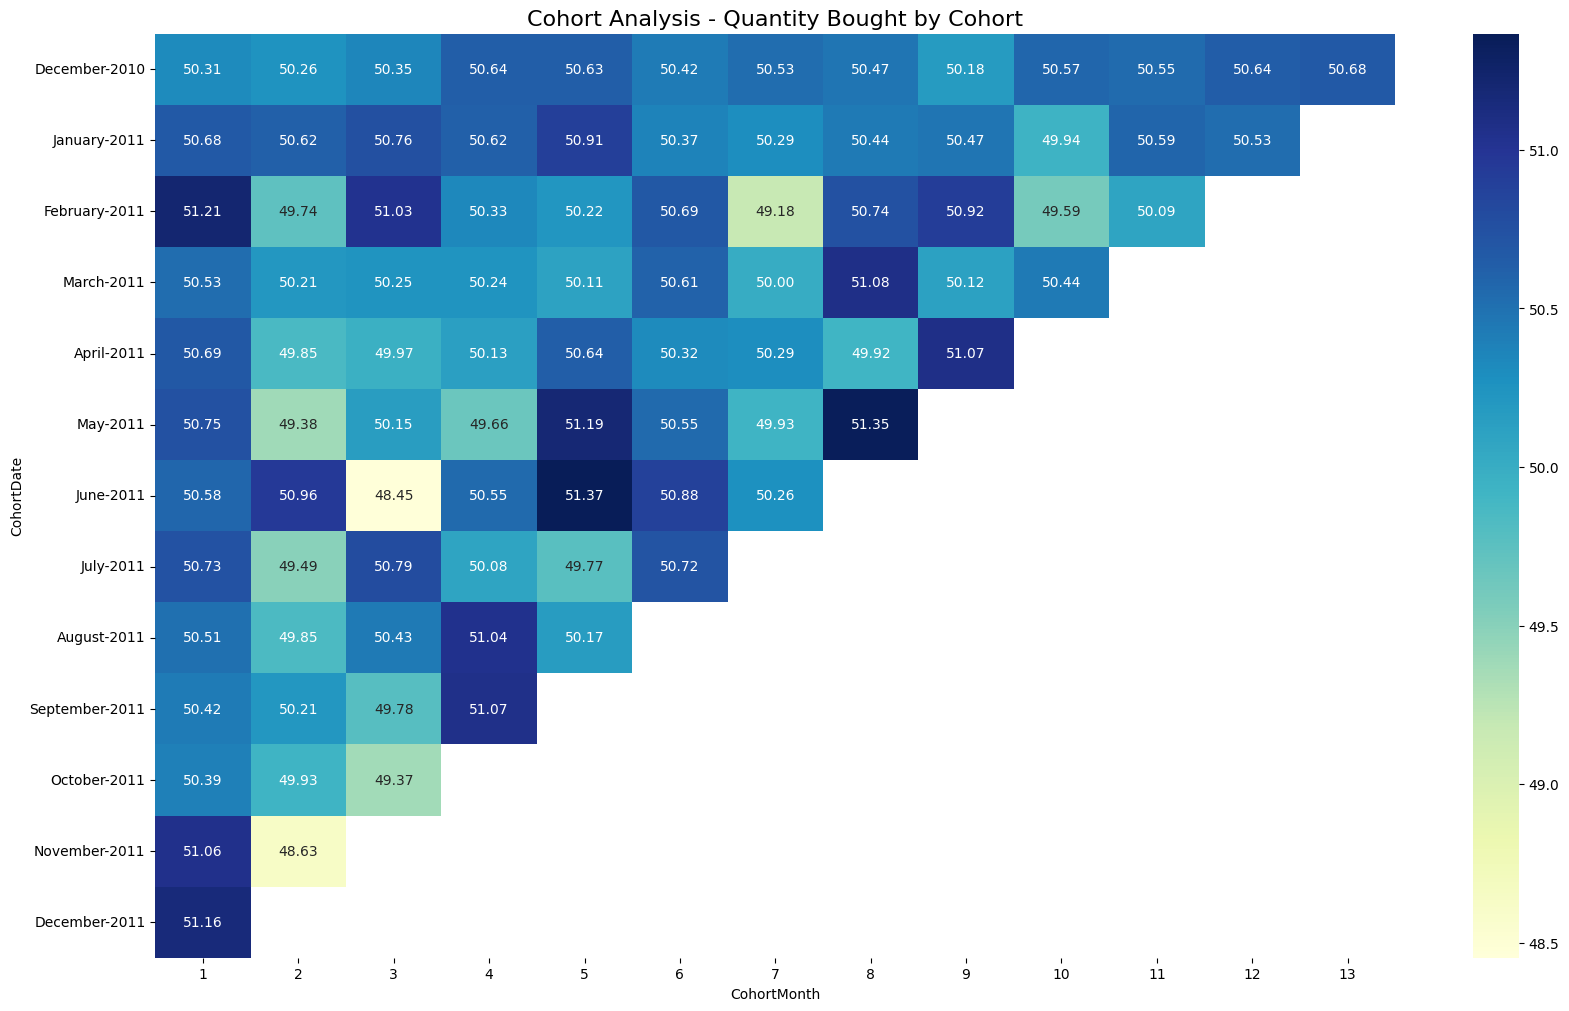

In [65]:
plt.figure(figsize=(20,12))
sns.heatmap(Quantity_table, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Cohort Analysis - Quantity Bought by Cohort', fontsize=16)
plt.show()
